In [1]:
import numpy as np
import tensorflow as tf
import pyttsx3
import matplotlib.pyplot as plt

2025-04-17 11:08:01.943735: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-17 11:08:01.945151: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-17 11:08:01.971399: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-17 11:08:01.972514: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-17 11:08:02.390518: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:

X_train = np.array([
    # Flu examples - fever, cough, fatigue
    [1, 1, 0, 1, 0, 0],
    [1, 1, 1, 1, 0, 0],
    [1, 0, 0, 1, 0, 0],
    # Cold examples - cough, sneezing
    [0, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    # COVID-19 examples - fever, cough, loss of taste
    [1, 1, 0, 0, 1, 0],
    [1, 1, 0, 1, 1, 0],
    [1, 0, 0, 1, 1, 0],
    # Allergy examples - sneezing, itchy eyes
    [0, 0, 1, 0, 0, 1],
    [0, 1, 1, 0, 0, 1],
    [0, 0, 1, 1, 0, 1]
], dtype=np.float32)

y_train = tf.keras.utils.to_categorical([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3], num_classes=4)
diseases = ["Flu", "Cold", "COVID-19", "Allergy"]

In [3]:
def build_model():
    inputs = tf.keras.Input(shape=(6,))
    x = tf.keras.layers.Dense(16, activation='relu')(inputs)
    x = tf.keras.layers.Dropout(0.5)(x)  # Remove training=True flag
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)  # Remove training=True flag
    outputs = tf.keras.layers.Dense(4, activation='softmax')(x)
    return tf.keras.Model(inputs, outputs)
model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)

In [4]:
def speak(text):
    engine = pyttsx3.init()
    engine.say(text)
    engine.runAndWait()

In [5]:
def predict_with_uncertainty(model, x, n_iter=100):
    preds = np.array([model(x, training=True).numpy() for _ in range(n_iter)])
    mean = preds.mean(axis=0)
    std = preds.std(axis=0)
    return mean, std

Hello! I am your virtual health assistant robot.
Please answer the following questions with Y/N:


Do you have Fever? (Y/N):  Y
Do you have Cough? (Y/N):  Y
Do you have Sneezing? (Y/N):  Y
Do you have Fatigue? (Y/N):  N
Do you have Loss of Taste? (Y/N):  N
Do you have Itchy Eyes? (Y/N):  N



Diagnosis with Probabilities and Uncertainty:
Flu: P=0.247, Uncertainty=0.075
Cold: P=0.284, Uncertainty=0.068
COVID-19: P=0.234, Uncertainty=0.053
Allergy: P=0.235, Uncertainty=0.090

Diagnosis: Cold (±0.068)


Exception ignored on calling ctypes callback function: <bound method DriverProxy.setBusy of <pyttsx3.driver.DriverProxy object at 0x7647883d7eb0>>
Traceback (most recent call last):
  File "/home/nqhuy/workBench/cq04_nqhuy_ass2/.venv/lib/python3.10/site-packages/pyttsx3/drivers/espeak.py", line 193, in _onSynth
    self._proxy.notify('finished-utterance', completed=True)
ReferenceError: weakly-referenced object no longer exists


Test: Nasal swab
Medicine: Rest, fluids, antihistamines


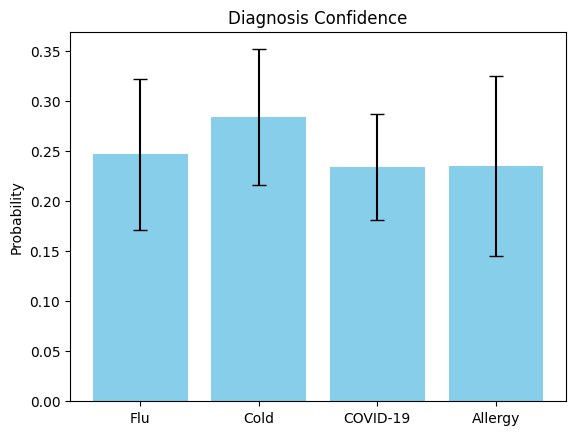

Exception ignored on calling ctypes callback function: <bound method EspeakDriver._onSynth of <pyttsx3.drivers.espeak.EspeakDriver object at 0x7647883d79d0>>
Traceback (most recent call last):
  File "/home/nqhuy/workBench/cq04_nqhuy_ass2/.venv/lib/python3.10/site-packages/pyttsx3/drivers/espeak.py", line 193, in _onSynth
    self._proxy.notify('finished-utterance', completed=True)
ReferenceError: weakly-referenced object no longer exists


In [7]:
def run_virtual_robot():
    print("Hello! I am your virtual health assistant robot.")
    print("Please answer the following questions with Y/N:")

    symptom_names = ["Fever", "Cough", "Sneezing", "Fatigue", "Loss of Taste", "Itchy Eyes"]
    input_symptoms = []

    for name in symptom_names:
        ans = input(f"Do you have {name}? (Y/N): ").strip().lower()
        input_symptoms.append(1 if ans == 'y' else 0)

    input_array = np.array([input_symptoms], dtype=np.float32)
    mean_probs, std_probs = predict_with_uncertainty(model, input_array)
    most_likely = np.argmax(mean_probs)
    diagnosis = diseases[most_likely]

    print("\nDiagnosis with Probabilities and Uncertainty:")
    for i, dis in enumerate(diseases):
        print(f"{dis}: P={mean_probs[0][i]:.3f}, Uncertainty={std_probs[0][i]:.3f}")

    speak(f"You may have {diagnosis}.")
    print(f"\nDiagnosis: {diagnosis} (±{std_probs[0][most_likely]:.3f})")

    test_map = {
        "Flu": "Influenza A/B test",
        "Cold": "Nasal swab",
        "COVID-19": "PCR test",
        "Allergy": "Allergy skin test"
    }
    medicine_map = {
        "Flu": "Oseltamivir (Tamiflu)",
        "Cold": "Rest, fluids, antihistamines",
        "COVID-19": "Isolation + Paracetamol",
        "Allergy": "Loratadine or Cetirizine"
    }

    speak(f"I recommend you take a {test_map[diagnosis]} and consider taking {medicine_map[diagnosis]}")
    print(f"Test: {test_map[diagnosis]}")
    print(f"Medicine: {medicine_map[diagnosis]}")

    plt.bar(diseases, mean_probs[0], yerr=std_probs[0], capsize=5, color='skyblue')
    plt.ylabel("Probability")
    plt.title("Diagnosis Confidence")
    plt.show()

# Gọi hàm
run_virtual_robot()
